In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords

In [60]:
data = pd.read_csv("TASK 4/twitter_training.csv")
data.columns = ['ID', 'Entity', 'Sentiment', 'Message']

In [61]:
print(data.head())

     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Message  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [62]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    text = text.split()
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

In [63]:
data['cleaned_text'] = data['Message'].apply(clean_text)

print(data[['Message', 'cleaned_text']].head())

sia = SentimentIntensityAnalyzer()

                                             Message  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                      cleaned_text  
0              coming borders kill  
1      im getting borderlands kill  
2     im coming borderlands murder  
3  im getting borderlands 2 murder  
4    im getting borderlands murder  


In [64]:
sentiment_counts = data['Message'].value_counts(normalize=True) * 100
print(sentiment_counts)

Message
                                                                                                                                                                                                                                                                      0.232448
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                0.232448
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    0.232448
<unk>                                                                                                                                                                              

In [65]:
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

In [66]:
data['vader_sentiment'] = data['cleaned_text'].apply(get_sentiment)

sentiment_counts = data['vader_sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)

vader_sentiment
positive    45.356918
negative    35.786880
neutral     18.856202
Name: proportion, dtype: float64


In [67]:
sentiment_distribution = combined_data['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Sentiment
Negative      22808
Positive      21108
Neutral       18603
Irrelevant    13161
Name: count, dtype: int64


C:\Users\Tirth\AppData\Local\Temp\ipykernel_5136\937437864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=combined_data, order=sentiment_distribution.index, palette='Set2')


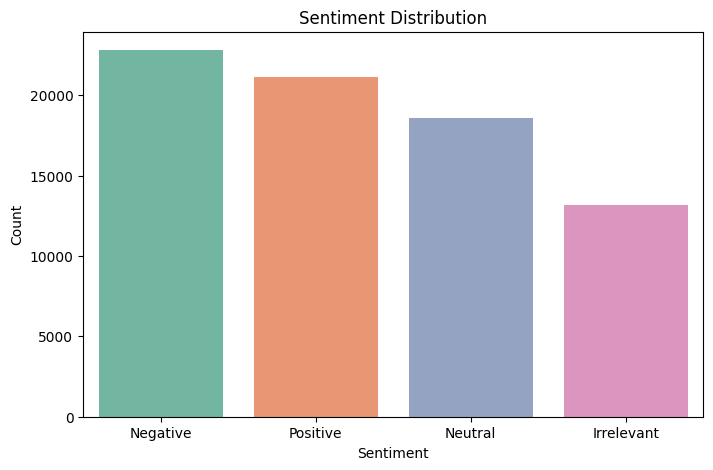

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=combined_data, order=sentiment_distribution.index, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

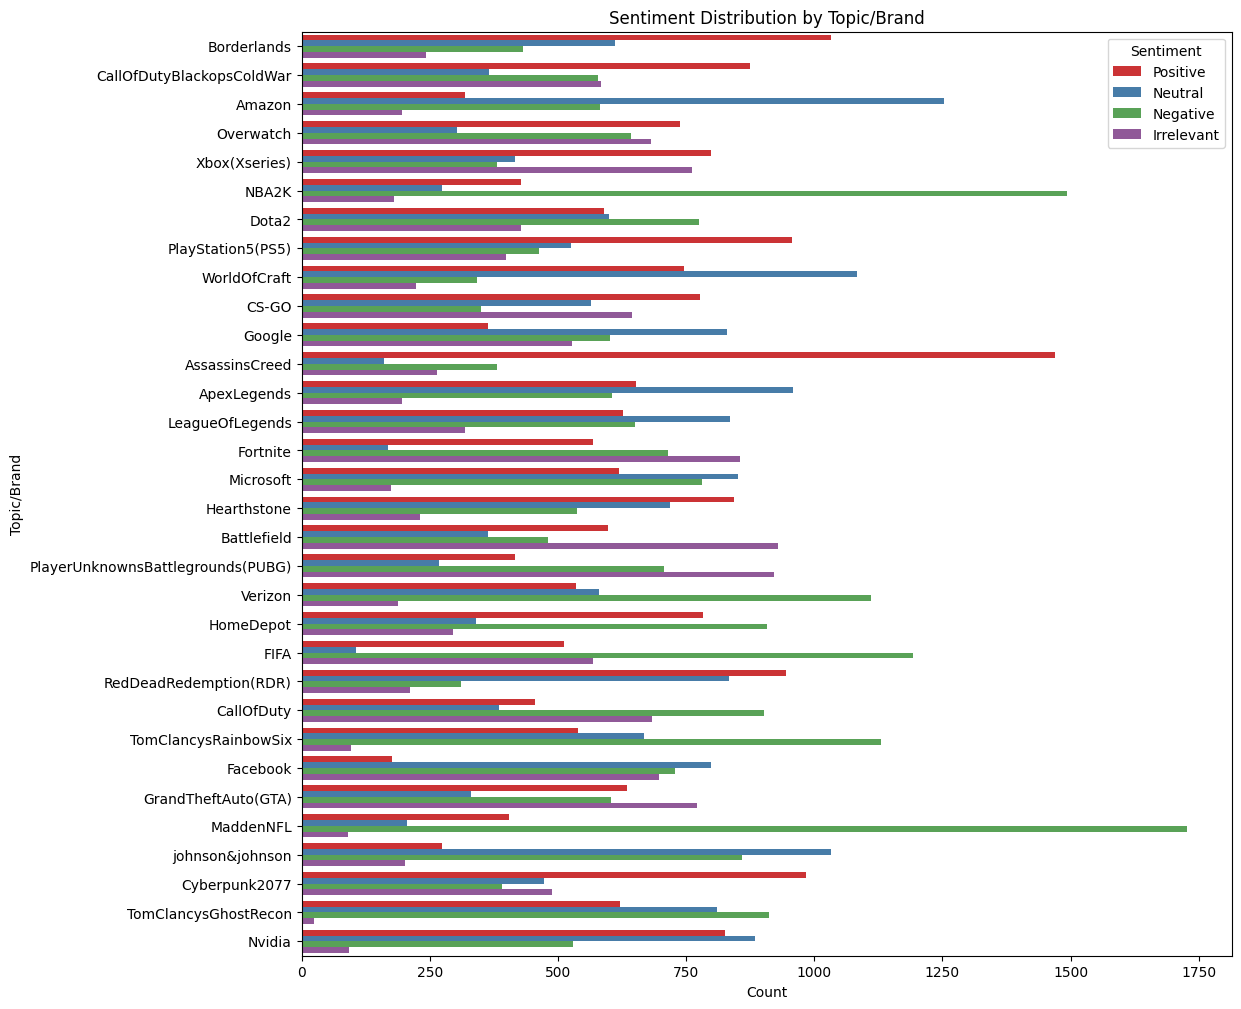

In [69]:
plt.figure(figsize=(12, 12))
sns.countplot(y='Topic', hue='Sentiment', data=combined_data, palette='Set1')
plt.title('Sentiment Distribution by Topic/Brand')
plt.xlabel('Count')
plt.ylabel('Topic/Brand')
plt.show()

In [70]:
positive_text = " ".join(combined_data[combined_data['Sentiment'] == 'Positive']['Topic'].astype(str))
negative_text = " ".join(combined_data[combined_data['Sentiment'] == 'Negative']['Topic'].astype(str))

In [71]:
custom_stopwords = set(STOPWORDS).union({"word1", "word2", "word3"})

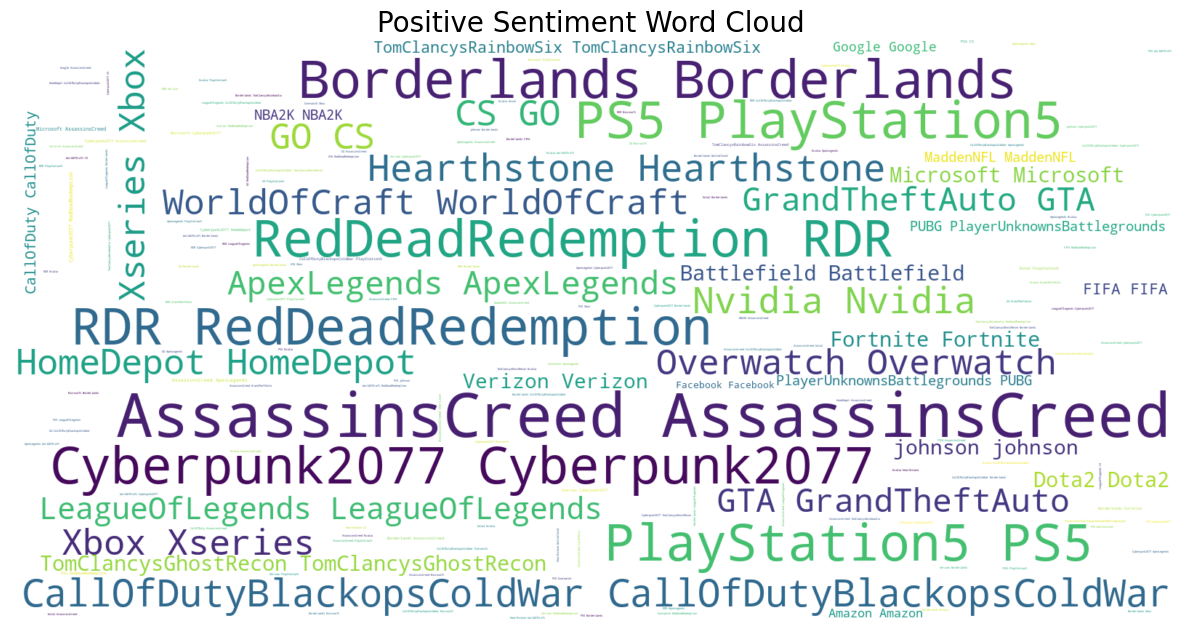

In [72]:
plt.figure(figsize=(15, 8))
positive_wordcloud = WordCloud(width=1600, 
                               height=800,
                               background_color='white',
                               colormap='viridis',  # Choose a color map that resembles your reference
                               stopwords=custom_stopwords,
                               max_words=300, 
                               contour_width=3, 
                               contour_color='steelblue',
                               random_state=42).generate(positive_text)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', fontsize=20)
plt.axis('off')
plt.show()

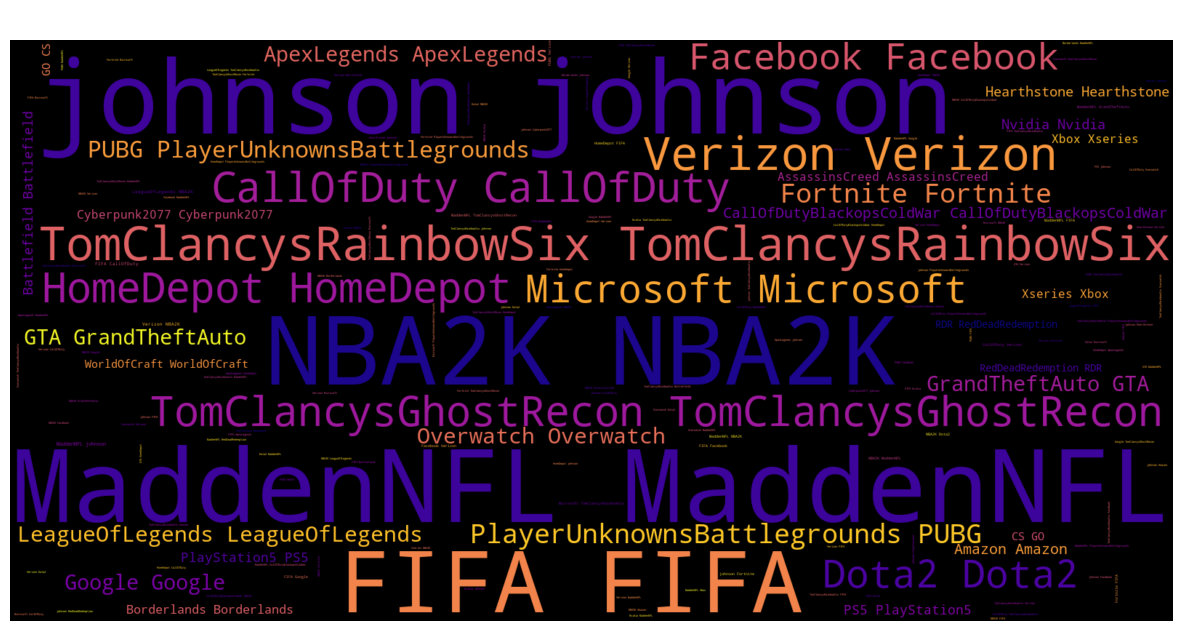

In [73]:
plt.figure(figsize=(15, 8))
negative_wordcloud = WordCloud(width=1600, 
                               height=800,
                               background_color='black',
                               colormap='plasma',  # Choose a color map that resembles your reference
                               stopwords=custom_stopwords,
                               max_words=300, 
                               contour_width=3, 
                               contour_color='firebrick',
                               random_state=42).generate(negative_text)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', fontsize=20, color='white')
plt.axis('off')
plt.show()